In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_csv("Data Model - Pizza Sales.csv")
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Unnamed: 12
0,1,1,hawaiian_m,1,1/1/15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2,2,classic_dlx_m,1,1/1/15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,3,2,five_cheese_l,1,1/1/15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,4,2,ital_supr_l,1,1/1/15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,5,2,mexicana_m,1,1/1/15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN
48616,48617,21348,four_cheese_l,1,12/31/15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN
48617,48618,21348,napolitana_s,1,12/31/15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN
48618,48619,21349,mexicana_l,1,12/31/15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


This pizza sales dataset make up 12 relevant features:

```order_id```: Unique identifier for each order placed by a table
    
```order_details_id```: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
    
```pizza_id```: Unique key identifier that ties the pizza ordered to its details, like size and price
    
```quantity```: Quantity ordered for each pizza of the same type and size
    
```order_date```: Date the order was placed (entered into the system prior to cooking & serving)
    
```order_time```: Time the order was placed (entered into the system prior to cooking & serving)
    
```unit_price```: Price of the pizza in USD
    
```total_price```: unit_price * quantity
    
```pizza_size```: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
    
```pizza_type```: Unique key identifier that ties the pizza ordered to its details, like size and price
    
```pizza_ingredients```: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
    
```pizza_name```: Name of the pizza as shown in the menu


# Data Cleaning

## Drop useless columns

In [3]:
df.drop(columns="Unnamed: 12",inplace=True)

## Check none values

In [47]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## Correct string in ```pizza_ingredients```

In [60]:
df['pizza_ingredients'] = df['pizza_ingredients'].str.replace('慛duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic','Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic')

## Change ```order_date``` datatype to timestamp

In [73]:
df.loc[:, "timestamp"] = df["order_date"].apply(lambda s: pd.Timestamp(s))

In [600]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,timestamp,month,day,weekday
0,1,1,hawaiian_m,1,1/1/15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01,1,1,Thursday
1,2,2,classic_dlx_m,1,1/1/15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01,1,1,Thursday
2,3,2,five_cheese_l,1,1/1/15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01,1,1,Thursday
3,4,2,ital_supr_l,1,1/1/15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01,1,1,Thursday
4,5,2,mexicana_m,1,1/1/15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01,1,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015-12-31,12,31,Thursday
48616,48617,21348,four_cheese_l,1,12/31/15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015-12-31,12,31,Thursday
48617,48618,21348,napolitana_s,1,12/31/15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015-12-31,12,31,Thursday
48618,48619,21349,mexicana_l,1,12/31/15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-12-31,12,31,Thursday


## Ingredients

In [120]:
toppings = list(df["pizza_ingredients"])
toppings

['Sliced Ham, Pineapple, Mozzarella Cheese',
 'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon',
 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic',
 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
 'Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic',
 'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce',
 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
 'Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
 'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
 'Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions',
 'Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese',
 'Spin

In [124]:
toppings_list = [t for tt in toppings for t in tt.split(',')]
toppings_list

['Sliced Ham',
 ' Pineapple',
 ' Mozzarella Cheese',
 'Pepperoni',
 ' Mushrooms',
 ' Red Onions',
 ' Red Peppers',
 ' Bacon',
 'Mozzarella Cheese',
 ' Provolone Cheese',
 ' Smoked Gouda Cheese',
 ' Romano Cheese',
 ' Blue Cheese',
 ' Garlic',
 'Calabrese Salami',
 ' Capocollo',
 ' Tomatoes',
 ' Red Onions',
 ' Green Olives',
 ' Garlic',
 'Tomatoes',
 ' Red Peppers',
 ' Jalapeno Peppers',
 ' Red Onions',
 ' Cilantro',
 ' Corn',
 ' Chipotle Sauce',
 ' Garlic',
 'Chicken',
 ' Pineapple',
 ' Tomatoes',
 ' Red Peppers',
 ' Thai Sweet Chilli Sauce',
 'Calabrese Salami',
 ' Capocollo',
 ' Tomatoes',
 ' Red Onions',
 ' Green Olives',
 ' Garlic',
 'Prosciutto di San Daniele',
 ' Arugula',
 ' Mozzarella Cheese',
 'Calabrese Salami',
 ' Capocollo',
 ' Tomatoes',
 ' Red Onions',
 ' Green Olives',
 ' Garlic',
 'Calabrese Salami',
 ' Capocollo',
 ' Tomatoes',
 ' Red Onions',
 ' Green Olives',
 ' Garlic',
 'Barbecued Chicken',
 ' Red Peppers',
 ' Green Peppers',
 ' Tomatoes',
 ' Red Onions',
 ' Barbe

In [125]:
toppings_list_cleaned = [word.replace(" ","") for word in toppings_list]
toppings_list_cleaned

['SlicedHam',
 'Pineapple',
 'MozzarellaCheese',
 'Pepperoni',
 'Mushrooms',
 'RedOnions',
 'RedPeppers',
 'Bacon',
 'MozzarellaCheese',
 'ProvoloneCheese',
 'SmokedGoudaCheese',
 'RomanoCheese',
 'BlueCheese',
 'Garlic',
 'CalabreseSalami',
 'Capocollo',
 'Tomatoes',
 'RedOnions',
 'GreenOlives',
 'Garlic',
 'Tomatoes',
 'RedPeppers',
 'JalapenoPeppers',
 'RedOnions',
 'Cilantro',
 'Corn',
 'ChipotleSauce',
 'Garlic',
 'Chicken',
 'Pineapple',
 'Tomatoes',
 'RedPeppers',
 'ThaiSweetChilliSauce',
 'CalabreseSalami',
 'Capocollo',
 'Tomatoes',
 'RedOnions',
 'GreenOlives',
 'Garlic',
 'ProsciuttodiSanDaniele',
 'Arugula',
 'MozzarellaCheese',
 'CalabreseSalami',
 'Capocollo',
 'Tomatoes',
 'RedOnions',
 'GreenOlives',
 'Garlic',
 'CalabreseSalami',
 'Capocollo',
 'Tomatoes',
 'RedOnions',
 'GreenOlives',
 'Garlic',
 'BarbecuedChicken',
 'RedPeppers',
 'GreenPeppers',
 'Tomatoes',
 'RedOnions',
 'BarbecueSauce',
 'KalamataOlives',
 'FetaCheese',
 'Tomatoes',
 'Garlic',
 'BeefChuckRoast',

In [136]:
toppings_keys = Counter(toppings_list_cleaned).keys()
toppings_keys

dict_keys(['SlicedHam', 'Pineapple', 'MozzarellaCheese', 'Pepperoni', 'Mushrooms', 'RedOnions', 'RedPeppers', 'Bacon', 'ProvoloneCheese', 'SmokedGoudaCheese', 'RomanoCheese', 'BlueCheese', 'Garlic', 'CalabreseSalami', 'Capocollo', 'Tomatoes', 'GreenOlives', 'JalapenoPeppers', 'Cilantro', 'Corn', 'ChipotleSauce', 'Chicken', 'ThaiSweetChilliSauce', 'ProsciuttodiSanDaniele', 'Arugula', 'BarbecuedChicken', 'GreenPeppers', 'BarbecueSauce', 'KalamataOlives', 'FetaCheese', 'BeefChuckRoast', 'Spinach', 'Artichokes', 'AsiagoCheese', 'GoatCheese', 'Oregano', 'Peperonciniverdi', 'Sun-driedTomatoes', 'PestoSauce', 'Zucchini', 'Artichoke', 'FontinaCheese', 'GoudaCheese', 'ItalianSausage', 'ChorizoSausage', 'SoppressataSalami', 'RicottaCheese', 'GorgonzolaPiccanteCheese', 'ParmigianoReggianoCheese', 'Anchovies', 'NdujaSalami', 'Pancetta', 'FriggitelloPeppers', 'Eggplant', 'PlumTomatoes', 'GenoaSalami', 'CoarseSicilianSalami', 'LuganegaSausage', 'Onions', 'AlfredoSauce', 'BrieCarreCheese', 'Prosciutt

In [137]:
toppings_values = Counter(toppings_list_cleaned).values()
toppings_values

dict_values([2370, 4685, 10333, 10300, 9624, 19547, 16284, 4227, 1359, 1359, 1359, 1359, 27422, 1849, 6572, 26601, 6174, 5643, 3341, 3341, 3341, 8443, 2315, 1428, 1428, 2372, 5224, 2372, 3269, 4748, 1406, 10012, 5682, 3342, 3301, 1414, 1887, 1880, 2893, 2485, 2302, 3259, 2302, 1811, 1811, 957, 1850, 1850, 1850, 1451, 927, 927, 927, 975, 923, 1422, 1887, 1887, 1887, 980, 480, 480, 480, 480, 480])

In [138]:
toppings_dic = dict(zip(toppings_keys, toppings_values))
toppings_dic

{'SlicedHam': 2370,
 'Pineapple': 4685,
 'MozzarellaCheese': 10333,
 'Pepperoni': 10300,
 'Mushrooms': 9624,
 'RedOnions': 19547,
 'RedPeppers': 16284,
 'Bacon': 4227,
 'ProvoloneCheese': 1359,
 'SmokedGoudaCheese': 1359,
 'RomanoCheese': 1359,
 'BlueCheese': 1359,
 'Garlic': 27422,
 'CalabreseSalami': 1849,
 'Capocollo': 6572,
 'Tomatoes': 26601,
 'GreenOlives': 6174,
 'JalapenoPeppers': 5643,
 'Cilantro': 3341,
 'Corn': 3341,
 'ChipotleSauce': 3341,
 'Chicken': 8443,
 'ThaiSweetChilliSauce': 2315,
 'ProsciuttodiSanDaniele': 1428,
 'Arugula': 1428,
 'BarbecuedChicken': 2372,
 'GreenPeppers': 5224,
 'BarbecueSauce': 2372,
 'KalamataOlives': 3269,
 'FetaCheese': 4748,
 'BeefChuckRoast': 1406,
 'Spinach': 10012,
 'Artichokes': 5682,
 'AsiagoCheese': 3342,
 'GoatCheese': 3301,
 'Oregano': 1414,
 'Peperonciniverdi': 1887,
 'Sun-driedTomatoes': 1880,
 'PestoSauce': 2893,
 'Zucchini': 2485,
 'Artichoke': 2302,
 'FontinaCheese': 3259,
 'GoudaCheese': 2302,
 'ItalianSausage': 1811,
 'ChorizoSa

In [145]:
toppings_df = pd.DataFrame.from_dict(toppings_dic, orient="index")
toppings_df.reset_index(inplace=True)
toppings_df.rename(columns={"index":"topping", 0:"count"},inplace=True)
toppings_df

,topping,count
0,SlicedHam,2370
1,Pineapple,4685
2,MozzarellaCheese,10333
3,Pepperoni,10300
4,Mushrooms,9624
...,...,...
60,BrieCarreCheese,480
61,Prosciutto,480
62,CaramelizedOnions,480
63,Pears,480


In [161]:
toppings_df_sorted = toppings_df.sort_values(by="count",ascending=False)
toppings_df_sorted

,topping,count
12,Garlic,27422
15,Tomatoes,26601
5,RedOnions,19547
6,RedPeppers,16284
2,MozzarellaCheese,10333
...,...,...
60,BrieCarreCheese,480
61,Prosciutto,480
62,CaramelizedOnions,480
63,Pears,480


In [162]:
px.bar(toppings_df_sorted,x="topping",y="count")

## Price distribution 

### Frequency

In [4]:
frequency = df.loc[:, ["pizza_category","unit_price"]]
frequency

,pizza_category,unit_price
0,Classic,13.25
1,Classic,16.00
2,Veggie,18.50
3,Supreme,20.75
4,Veggie,16.00
...,...,...
48615,Chicken,16.75
48616,Veggie,17.95
48617,Classic,12.00
48618,Veggie,20.25


In [6]:
pivot1 = frequency.pivot(columns = 'pizza_category',values = 'unit_price')

In [451]:
pivot1

pizza_category,Chicken,Classic,Supreme,Veggie
0,NaN,13.25,NaN,NaN
1,NaN,16.00,NaN,NaN
2,NaN,NaN,NaN,18.50
3,NaN,NaN,20.75,NaN
4,NaN,NaN,NaN,16.00
...,...,...,...,...
48615,16.75,NaN,NaN,NaN
48616,NaN,NaN,NaN,17.95
48617,NaN,12.00,NaN,NaN
48618,NaN,NaN,NaN,20.25


In [26]:
from matplotlib import font_manager
import matplotlib.ticker as tick
from matplotlib.ticker import EngFormatter, StrMethodFormatter

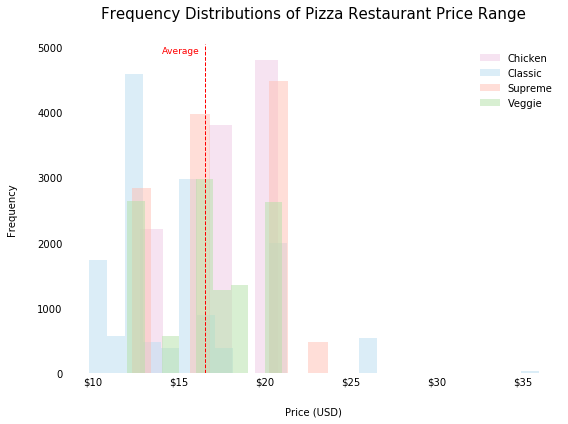

In [29]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

x = frequency["unit_price"]

ax.hist(pivot1["Chicken"], bins=6, alpha=0.5, label="Chicken", color="#eec9e5")
ax.hist(pivot1["Classic"], bins=25, alpha=0.5, label="Classic", color="#b9ddf1")
ax.hist(pivot1["Supreme"], bins=10, alpha=0.5, label="Supreme", color="#ffbeb2")
ax.hist(pivot1["Veggie"], bins=9, alpha=0.5, label="Veggie", color="#b3e1a6")

ax.set_frame_on(False) 

ax.text(14, 4900, "Average", fontsize = 9, color="red")

plt.xlabel("Price (USD)", size=10, labelpad=20)
plt.ylabel("Frequency", size=10, labelpad=20)

ax.xaxis.set_major_formatter(StrMethodFormatter("${x:.0f}"))

ax.tick_params(axis=u'y', which=u'both',length=0)
ax.tick_params(axis=u'x', which=u'both',length=0)

plt.title("Frequency Distributions of Pizza Restaurant Price Range", size=15, pad=26)
plt.legend(loc='upper right', frameon=False)

plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.savefig('consumer preference1.jpg',dpi=250)

plt.show()

### Graph

In [181]:
price = df.loc[:, ["pizza_category","pizza_size","unit_price"]]
price

,pizza_category,pizza_size,unit_price
0,Classic,M,13.25
1,Classic,M,16.00
2,Veggie,L,18.50
3,Supreme,L,20.75
4,Veggie,M,16.00
...,...,...,...
48615,Chicken,M,16.75
48616,Veggie,L,17.95
48617,Classic,S,12.00
48618,Veggie,L,20.25


In [267]:
price_pivot = pd.pivot_table(price, values='unit_price', index=["pizza_category"],
                    columns=['pizza_size'],aggfunc=np.mean)
price_pivot

pizza_size,L,M,S,XL,XXL
pizza_category,,,,,
Chicken,20.750000,16.750000,12.750000,NaN,NaN
Classic,18.376850,14.739122,11.375021,25.5,35.95
Supreme,20.652837,16.429972,14.048149,NaN,NaN
Veggie,19.295383,15.938485,12.161352,NaN,NaN


In [268]:
price_pivot = price_pivot.reset_index().rename_axis(None, axis=1)
price_pivot

,pizza_category,L,M,S,XL,XXL
0,Chicken,20.750000,16.750000,12.750000,NaN,NaN
1,Classic,18.376850,14.739122,11.375021,25.5,35.95
2,Supreme,20.652837,16.429972,14.048149,NaN,NaN
3,Veggie,19.295383,15.938485,12.161352,NaN,NaN


In [269]:
price_pivot.set_index(["pizza_category"],inplace=True)
price_pivot

,L,M,S,XL,XXL
pizza_category,,,,,
Chicken,20.750000,16.750000,12.750000,NaN,NaN
Classic,18.376850,14.739122,11.375021,25.5,35.95
Supreme,20.652837,16.429972,14.048149,NaN,NaN
Veggie,19.295383,15.938485,12.161352,NaN,NaN


In [297]:
categories = price_pivot.columns

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
      r=list(price_pivot.loc["Classic"].values),
      theta=categories,
      fill='toself',
      name='Classic'
))


fig.add_trace(go.Scatterpolar(
      r=list(price_pivot.loc["Supreme"].values),
      theta=categories,
      fill='toself',
      name='Supreme'
))

fig.add_trace(go.Scatterpolar(
      r=list(price_pivot.loc["Veggie"].values),
      theta=categories,
      fill='toself',
      name='Veggie'
))

fig.add_trace(go.Scatterpolar(
      r=list(price_pivot.loc["Chicken"].values),
      theta=categories,
      fill='toself',
      name='Chicken'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

## The most popular pizza

In [370]:
fig = px.treemap(df,
                 path = ['pizza_category', 'pizza_name', 'pizza_size'],
                 values = 'quantity')

fig.update_layout(title="The Best Selling Pizza",
                  titlefont={'size': 24,
                            },
                  template='simple_white',
                  treemapcolorway = ["#9fc5e8", "#f36a6a", '#5F8D37', "#fba6d0"],
                  height = 600,
                  width = 1000,
                  margin=dict(t=100)
                 )
fig.show()